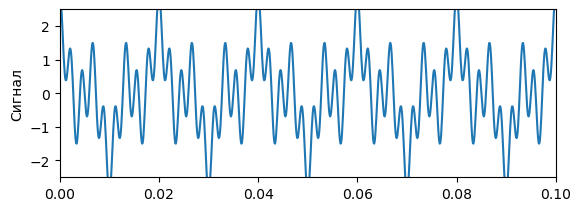

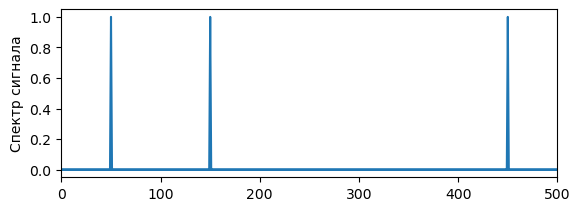

In [131]:
from math import pi, cos, sqrt
import numpy as np
import matplotlib.pyplot as plt

freq_fst = 50
freq_snd = 150
freq_trd = 450
def w(frequency):
    return 2 * pi * frequency

def x(t):
    return cos(w(freq_fst) * t) + cos(w(freq_snd) * t) + cos(w(freq_trd) * t)

x_val = 0
x_values = []
y_values = []
steps = 10000

for i in range(steps):
    x_values.append(x_val)
    y_values.append(x(x_val))
    x_val += 1 / steps

plt.subplot(2, 1, 1)
plt.plot(x_values, y_values)
plt.axis((0, 0.1, -2.5, 2.5))
plt.ylabel("Сигнал")
plt.show()

freq_values = np.fft.fftfreq(steps, 1 / steps)

density_values = 2 * abs(np.fft.fft(y_values)) / steps

plt.subplot(2, 1, 2)
plt.plot(freq_values, density_values)
plt.xlim(0, 500)
plt.ylabel("Спектр сигнала")
plt.show()

In [147]:
def butterworth_general(freq_in, freq_cutoff):
    omega = freq_in / freq_cutoff
    return 1 / (-omega**2 + 1j * sqrt(2) * omega + 1)

def butterworth(freq_in, freq_cutoff):
    if freq_in == 0:
        return 1
    num = (w(freq_cutoff)**2)
    denom = -w(freq_in)**2 + 1j * sqrt(2) * w(freq_cutoff) * w(freq_in) + w(freq_cutoff)**2
    res = num / denom
    return res

In [149]:
freq_cutoff = 70

H_filter = [butterworth_general(f, freq_cutoff) for f in freq_values]
density_values_filtered = abs(density_values * H_filter)

y_values_filtered = np.fft.ifft(density_values_filtered)

plt.subplot(2, 2, 1)
plt.plot(freq_values, density_values)
plt.ylabel("Оригинал")
plt.xlim(0, 500)
plt.autoscale(axis='y')

plt.subplot(2, 2, 2)
plt.plot(x_values, y_values)
plt.axis((0, 0.1, -2.5, 2.5))
plt.ylabel("Cигнал")
plt.show()

plt.subplot(2, 2, 1)
plt.plot(freq_values, density_values_filtered)
plt.xlim(0, 500)
plt.autoscale(axis='y')
plt.ylabel("Отфильтрованный спектр сигнала")

plt.subplot(2, 2, 2)
plt.plot(x_values, H_filter)
plt.axis((0, 0.1, -2.5, 2.5))
plt.autoscale(axis='y')
plt.ylabel("Отфильтрованный сигнал")
plt.show()

ValueError: operands could not be broadcast together with shapes (10000,) (100000000,) 